In [1]:
import pywt
import numpy as np
import os

normalized_folder = 'test_normalized_packet_data'
wavelet_transformed_folder = 'test_wavelet_transformed_data'

# Create the wavelet_transformed_data folder if it doesn't exist
if not os.path.exists(wavelet_transformed_folder):
    os.makedirs(wavelet_transformed_folder)

# Updated file names for consistency in naming
file_names = ['test_32x32_normalized.npy', 'test_60x60_normalized.npy', 'test_116x116_normalized.npy', 
              'test_228x228_normalized.npy', 'test_452x452_normalized.npy']

def apply_dwt(image, wavelet):
    """
    Apply 2D Discrete Wavelet Transform to an image.

    :param image: 2D numpy array representing the image.
    :param wavelet: Name of the wavelet filter.
    :return: The LL sub-band of the wavelet-transformed image.
    """
    coeffs = pywt.dwt2(image, wavelet)
    LL, _ = coeffs
    return LL

for file_name in file_names:
    # Load the normalized data from the normalized folder
    normalized_file_path = os.path.join(normalized_folder, file_name)
    image_data = np.load(normalized_file_path)

    # Initialize an empty list to store layered data for each image
    layered_data_list = []

    # Apply DWT and layer the data for each image in the file
    for image in image_data:
        ll_data_coif1 = apply_dwt(image, wavelet='coif1')
        ll_data_db3 = apply_dwt(image, wavelet='db3')  # Daubechies 3
        ll_data_rbior13 = apply_dwt(image, wavelet='rbio1.3')  # Reverse biorthogonal 1.3

        # Layer the LL data
        layered_data = np.stack((ll_data_coif1, ll_data_db3, ll_data_rbior13), axis=-1)
        layered_data_list.append(layered_data)

    # Convert the list to a numpy array
    layered_data_array = np.array(layered_data_list)

    # Save the layered data to the wavelet_transformed_data folder
    save_file_name = os.path.join(wavelet_transformed_folder, 'layered_' + file_name)
    np.save(save_file_name, layered_data_array)
    print(f"Test Layered data saved to {save_file_name}")


/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Test Layered data saved to test_wavelet_transformed_data/layered_test_32x32_normalized.npy
Test Layered data saved to test_wavelet_transformed_data/layered_test_60x60_normalized.npy
Test Layered data saved to test_wavelet_transformed_data/layered_test_116x116_normalized.npy
Test Layered data saved to test_wavelet_transformed_data/layered_test_228x228_normalized.npy
Test Layered data saved to test_wavelet_transformed_data/layered_test_452x452_normalized.npy


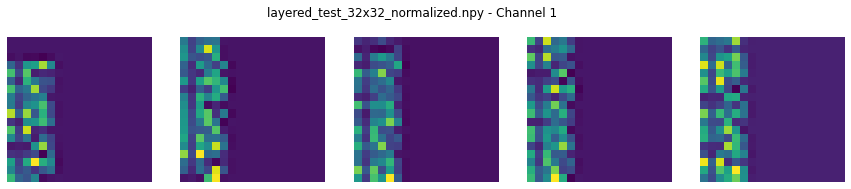

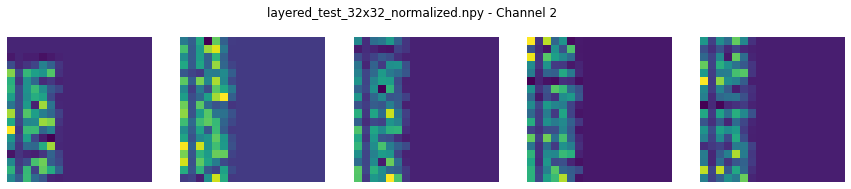

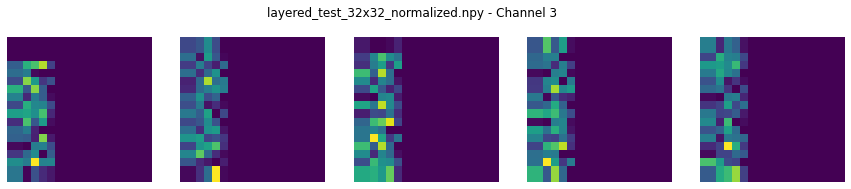

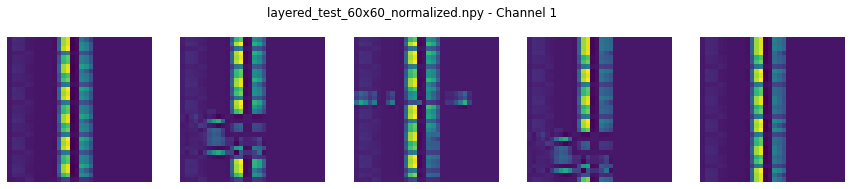

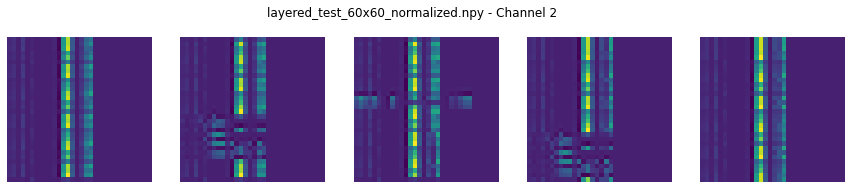

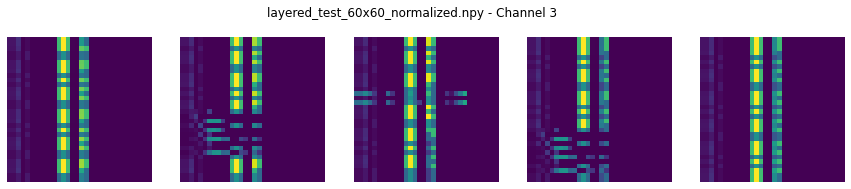

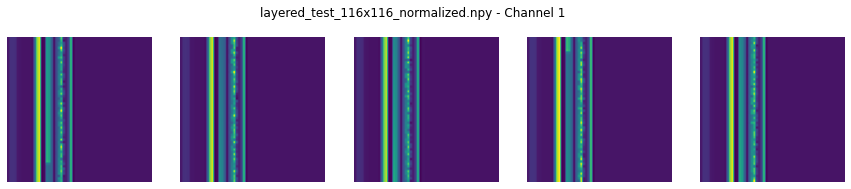

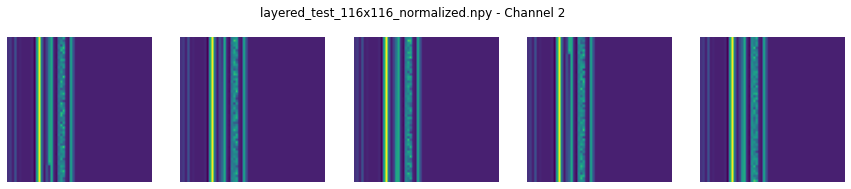

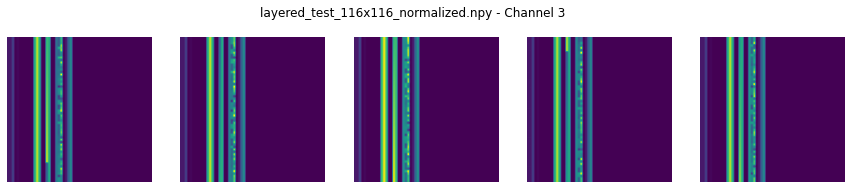

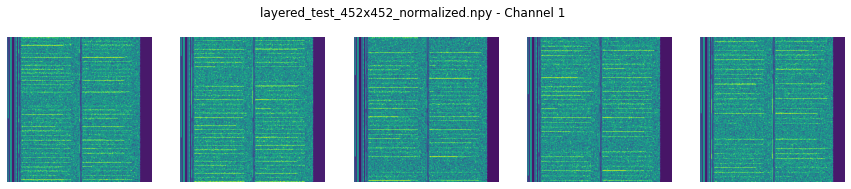

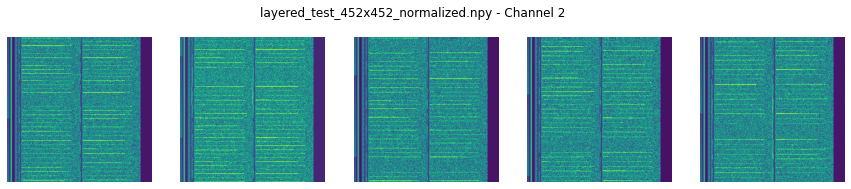

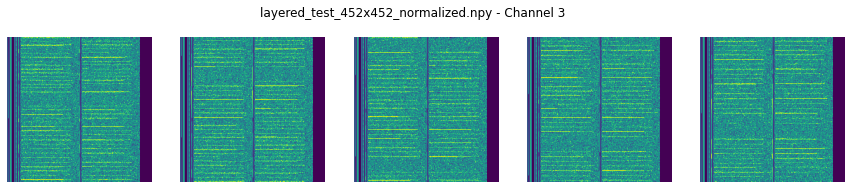

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Folder path where wavelet transformed data is stored
wavelet_transformed_folder = 'test_wavelet_transformed_data'

file_names = ['layered_test_32x32_normalized.npy', 'layered_test_60x60_normalized.npy', 'layered_test_116x116_normalized.npy', 
               'layered_test_452x452_normalized.npy']

# Function to visualize the images
def visualize_images(images, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title)
    for i, ax in enumerate(axes):
        # Display the i-th image
        ax.imshow(images[i])
        ax.axis('off')
    plt.show()

for file_name in file_names:
    # Load the wavelet transformed data
    transformed_file_path = os.path.join(wavelet_transformed_folder, file_name)
    image_data = np.load(transformed_file_path)

    # Select the first 5 images
    first_five_images = image_data[:5]

    # Assuming each image is n x n x 3, visualize each channel separately
    for channel in range(3):
        channel_images = first_five_images[:, :, :, channel]
        visualize_images(channel_images, f"{file_name} - Channel {channel + 1}")


In [3]:
import numpy as np
import os

wavelet_transformed_folder = 'test_wavelet_transformed_data'

# Retrieve all .npy files in the folder
file_names = [f for f in os.listdir(wavelet_transformed_folder) if f.endswith('.npy')]

# Load each file and print its shape along with the file name
for file_name in file_names:
    file_path = os.path.join(wavelet_transformed_folder, file_name)
    data = np.load(file_path)
    print(f"File: {file_name}, Shape: {data.shape}")

# Output the total number of files
print(f"Total number of files: {len(file_names)}")


File: layered_test_228x228_normalized.npy, Shape: (0,)
File: layered_test_32x32_normalized.npy, Shape: (17482, 18, 18, 3)
File: layered_test_60x60_normalized.npy, Shape: (519, 32, 32, 3)
File: layered_test_116x116_normalized.npy, Shape: (28, 60, 60, 3)
File: layered_test_452x452_normalized.npy, Shape: (439, 228, 228, 3)
Total number of files: 5
